### Notebook for comparison of models and training dataset size

In [1]:
%load_ext autoreload
%autoreload 1

%aimport dataset_processing
%aimport models
import pandas as pd
import numpy as np
import datetime as dt

training_path = "data/training_dataset.csv"
evaluation_path = "data/evaluation_dataset.csv"
final_evaluation_path = "data/final_evaluation_dataset.csv"

In [2]:
train_df = dataset_processing.generate_dataset(training_path,interval_length=3,
                                               num_past_intervals=15,num_timesteps_whole_network = 0,
                                                 exclude_zero_flows=True, start_time = dt.time(7,30),
                                                 end_time = dt.time(8,30))
test_df = dataset_processing.generate_dataset(evaluation_path,interval_length=3,
                                               num_past_intervals=15, num_timesteps_whole_network = 0,
                                               exclude_zero_flows = True,start_time = dt.time(7,30),
                                                 end_time = dt.time(8,30))

In [ ]:
## Get constact prediction for experiment #1
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score


train_df["base_prediction"] = (train_df["flow_prev_0_3_min"] + train_df["flow_prev_3_6_min"] + \
                              train_df["flow_prev_6_9_min"] + train_df["flow_prev_9_12_min"] + \
                              train_df["flow_prev_12_15_min"])
y_pred = train_df["base_prediction"]
y_train = train_df["flow_next_15min"]

rmse_train_base = root_mean_squared_error(y_train, y_pred)
mape_train_base = mean_absolute_percentage_error(y_train, y_pred)

test_df["base_prediction"] = (test_df["flow_prev_0_3_min"] + test_df["flow_prev_3_6_min"] + \
                              test_df["flow_prev_6_9_min"] + test_df["flow_prev_9_12_min"] + \
                              test_df["flow_prev_12_15_min"])

y_pred = test_df["base_prediction"]
y_test = test_df["flow_next_15min"]

rmse_test_base = root_mean_squared_error(y_test, y_pred)
mape_test_base = mean_absolute_percentage_error(y_test, y_pred)

print(rmse_train_base)
print(mape_train_base)

print(rmse_test_base)
print(mape_test_base)

27.193255567599095
0.10749753071825985
30.504637780663778
0.11944461711792109


### Experiment 1

In [19]:
list_training_months = [6, 7, 8, 9, 10, 11, 12]

results_df = pd.DataFrame(columns=[
    "number_of_months",
    "rmse_train_lr", "rmse_test_lr", "mape_train_lr", "mape_test_lr",
    "rmse_train_lasso", "rmse_test_lasso", "mape_train_lasso", "mape_test_lasso",
    "rmse_train_nn", "rmse_test_nn", "mape_train_nn", "mape_test_nn"
])

for i in range(1, len(list_training_months) + 1):
    training_months = list_training_months[0:i]

    red_train_df = train_df[train_df["datetime"].dt.month.isin(training_months)]

    model_lr, rmse_train_lr, rmse_test_lr, mape_train_lr, mape_test_lr = models.train_linear_regression(red_train_df, test_df)
    model_dict_lasso, rmse_train_lasso, rmse_test_lasso, mape_train_lasso, mape_test_lasso = models.train_sensor_models_with_lasso(red_train_df, test_df)
    nn_model, rmse_train_nn, rmse_test_nn, mape_train_nn, mape_test_nn = models.train_nn_model(red_train_df, test_df, model_name=f"nn_models/exp_1/nn_model_{i}.keras")

    results_df = pd.concat([
        results_df,
        pd.DataFrame([{
            "number_of_months": i,
            "rmse_train_lr": rmse_train_lr, "rmse_test_lr": rmse_test_lr,
            "mape_train_lr": mape_train_lr, "mape_test_lr": mape_test_lr,
            "rmse_train_lasso": rmse_train_lasso, "rmse_test_lasso": rmse_test_lasso,
            "mape_train_lasso": mape_train_lasso, "mape_test_lasso": mape_test_lasso,
            "rmse_train_nn": rmse_train_nn, "rmse_test_nn": rmse_test_nn,
            "mape_train_nn": mape_train_nn, "mape_test_nn": mape_test_nn
        }])
    ], ignore_index=True)
results_df        

d:\KTH\Applied Artificial Intelligence in Transportation\AH2179-Project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\jemaa\AppData\Local\Temp\ipykernel_11452\448057320.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([
d:\KTH\Applied Artificial Intelligence in Transportation\AH2179-Project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequenti

,number_of_months,rmse_train_lr,rmse_test_lr,mape_train_lr,mape_test_lr,rmse_train_lasso,rmse_test_lasso,mape_train_lasso,mape_test_lasso,rmse_train_nn,rmse_test_nn,mape_train_nn,mape_test_nn
0,1,22.351236,28.132496,0.090494,0.122315,20.675024,28.775721,0.081587,0.130446,21.696042,27.760036,0.082519,0.111247
1,2,21.896950,28.838365,0.091922,0.125226,20.630452,29.386920,0.085769,0.132820,22.339230,27.797999,0.088711,0.114445
2,3,22.274331,27.968799,0.095066,0.122150,21.198972,27.941524,0.088566,0.125591,21.635916,28.625243,0.088857,0.116503
3,4,22.394250,27.585681,0.093983,0.121067,21.127259,27.975402,0.086208,0.127614,21.926925,26.738569,0.087280,0.109107
4,5,22.327840,27.393964,0.093914,0.120010,20.950843,27.743977,0.085192,0.126109,21.891210,28.264877,0.092030,0.121554
5,6,23.144967,27.175451,0.096045,0.119126,21.975098,26.962943,0.088144,0.119379,22.129927,27.109357,0.088660,0.111827
6,7,23.330900,26.991047,0.098349,0.115853,22.299756,26.340631,0.091621,0.111911,22.300855,26.989160,0.093115,0.112529


In [37]:
results_df.to_csv("results_exp_1_v2.csv", index = False)

### Experiment 2

In [21]:
list_training_days = [5,10,15,20,25,30]


results_df_extended = pd.DataFrame(columns=[
    "number_of_days",
    "rmse_train_lr", "rmse_test_lr", "mape_train_lr", "mape_test_lr",
    "rmse_train_lasso", "rmse_test_lasso", "mape_train_lasso", "mape_test_lasso",
    "rmse_train_nn", "rmse_test_nn", "mape_train_nn", "mape_test_nn"
])

for i in range(len(list_training_days)):
    max_train_day = list_training_days[i]
    
    red_train_df_general = train_df[(train_df["datetime"].dt.month == 6) & (train_df["datetime"].dt.day <= list_training_days[i])]

    model_lr, rmse_train_lr, rmse_test_lr, mape_train_lr, mape_test_lr = models.train_linear_regression(red_train_df_general, test_df)
    model_dict_lasso, rmse_train_lasso, rmse_test_lasso, mape_train_lasso, mape_test_lasso = models.train_sensor_models_with_lasso(red_train_df_general, test_df)
    nn_model, rmse_train_nn, rmse_test_nn, mape_train_nn, mape_test_nn = models.train_nn_model(red_train_df_general, test_df, model_name=f"nn_models/exp_2/nn_model_{i}.keras")

    results_df_extended = pd.concat([
        results_df_extended,
        pd.DataFrame([{
            "number_of_days": list_training_days[i],
            "rmse_train_lr": rmse_train_lr, "rmse_test_lr": rmse_test_lr,
            "mape_train_lr": mape_train_lr, "mape_test_lr": mape_test_lr,
            "rmse_train_lasso": rmse_train_lasso, "rmse_test_lasso": rmse_test_lasso,
            "mape_train_lasso": mape_train_lasso, "mape_test_lasso": mape_test_lasso,
            "rmse_train_nn": rmse_train_nn, "rmse_test_nn": rmse_test_nn,
            "mape_train_nn": mape_train_nn, "mape_test_nn": mape_test_nn
        }])
    ], ignore_index=True)
results_df_extended        

d:\KTH\Applied Artificial Intelligence in Transportation\AH2179-Project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\jemaa\AppData\Local\Temp\ipykernel_11452\819523879.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df_extended = pd.concat([
d:\KTH\Applied Artificial Intelligence in Transportation\AH2179-Project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using

,number_of_days,rmse_train_lr,rmse_test_lr,mape_train_lr,mape_test_lr,rmse_train_lasso,rmse_test_lasso,mape_train_lasso,mape_test_lasso,rmse_train_nn,rmse_test_nn,mape_train_nn,mape_test_nn
0,5,19.408060,30.472885,0.080899,0.141980,12.740837,76.948946,0.049005,0.414807,20.034687,29.585648,0.080951,0.125995
1,10,21.682433,28.700008,0.086988,0.135398,17.703050,37.405503,0.066549,0.198329,24.883153,32.237317,0.098542,0.142713
2,15,21.341122,28.476993,0.087996,0.129056,18.415619,35.329744,0.072003,0.182633,21.509086,27.768577,0.086612,0.120171
3,20,21.927752,28.429973,0.089270,0.127558,19.381924,33.814371,0.075396,0.173770,23.869354,31.990159,0.094057,0.138165
4,25,22.084590,28.467460,0.088103,0.127544,20.133962,30.579242,0.076633,0.147495,22.436080,27.811099,0.087045,0.119850
5,30,22.351236,28.132496,0.090494,0.122315,20.675024,28.775721,0.081587,0.130446,21.741431,27.559273,0.082897,0.111003


In [36]:
results_df_extended.to_csv("results_exp_2_v2.csv", index=False)

### Experiment 3

In [ ]:
list_training_months = [6, 7, 8, 9, 10, 11, 12,1,2,3,4]

results_df_2 = pd.DataFrame(columns=[
    "number_of_months",
    "rmse_train_lr", "rmse_test_lr", "mape_train_lr", "mape_test_lr",
    "rmse_train_lasso", "rmse_test_lasso", "mape_train_lasso", "mape_test_lasso",
    "rmse_train_nn", "rmse_test_nn", "mape_train_nn", "mape_test_nn"
])


full_df = pd.concat([train_df,test_df],axis = 0)
red_test_df = full_df[full_df["datetime"].dt.month == 5]

for i in range(1, len(list_training_months) + 1):
    training_months = list_training_months[0:i]

    red_train_df = full_df[full_df["datetime"].dt.month.isin(training_months)]


    model_lr, rmse_train_lr, rmse_test_lr, mape_train_lr, mape_test_lr = models.train_linear_regression(red_train_df, red_test_df)
    model_dict_lasso, rmse_train_lasso, rmse_test_lasso, mape_train_lasso, mape_test_lasso = models.train_sensor_models_with_lasso(red_train_df, red_test_df)
    nn_model, rmse_train_nn, rmse_test_nn, mape_train_nn, mape_test_nn = models.train_nn_model(red_train_df, red_test_df, model_name=f"nn_models/exp_3/nn_model_{i}.keras")

    results_df_2 = pd.concat([
        results_df_2,
        pd.DataFrame([{
            "number_of_months": i,
            "rmse_train_lr": rmse_train_lr, "rmse_test_lr": rmse_test_lr,
            "mape_train_lr": mape_train_lr, "mape_test_lr": mape_test_lr,
            "rmse_train_lasso": rmse_train_lasso, "rmse_test_lasso": rmse_test_lasso,
            "mape_train_lasso": mape_train_lasso, "mape_test_lasso": mape_test_lasso,
            "rmse_train_nn": rmse_train_nn, "rmse_test_nn": rmse_test_nn,
            "mape_train_nn": mape_train_nn, "mape_test_nn": mape_test_nn
        }])
    ], ignore_index=True)
results_df_2        

d:\KTH\Applied Artificial Intelligence in Transportation\AH2179-Project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\jemaa\AppData\Local\Temp\ipykernel_11452\2299727456.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df_2 = pd.concat([
d:\KTH\Applied Artificial Intelligence in Transportation\AH2179-Project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Seque

,number_of_months,rmse_train_lr,rmse_test_lr,mape_train_lr,mape_test_lr,rmse_train_lasso,rmse_test_lasso,mape_train_lasso,mape_test_lasso,rmse_train_nn,rmse_test_nn,mape_train_nn,mape_test_nn
0,1,23.977395,27.398970,0.094843,0.098958,22.588852,27.136137,0.088789,0.097360,23.333234,26.656431,0.086174,0.095477
1,2,22.984130,27.782052,0.094370,0.099847,21.838404,26.996165,0.089377,0.096362,23.483963,26.688823,0.093145,0.094896
2,3,22.985240,26.989386,0.096384,0.097806,21.961227,25.995142,0.090707,0.092275,24.053217,31.178524,0.098370,0.110898
3,4,22.942185,26.483312,0.095101,0.096345,21.762300,25.411383,0.088221,0.090020,22.094344,25.913665,0.087496,0.091558
4,5,22.791857,26.250456,0.094845,0.095754,21.507607,25.101356,0.086960,0.088684,21.986066,25.798794,0.087342,0.091575
5,6,23.470211,26.088073,0.096732,0.095196,22.344243,25.170969,0.089351,0.088783,23.620629,25.073038,0.090014,0.089495
6,7,23.606149,26.151566,0.098868,0.094955,22.603107,25.418044,0.092501,0.089493,22.866161,26.682091,0.094596,0.096778
7,8,23.493657,26.195253,0.100351,0.094854,22.540272,25.490984,0.094050,0.089515,22.490095,25.048453,0.090034,0.088696
8,9,23.621387,26.167825,0.100792,0.094697,22.684151,25.458859,0.094743,0.089368,22.526928,24.955120,0.091524,0.089400
9,10,24.244806,26.071161,0.102717,0.094592,23.321261,25.410126,0.096526,0.089237,23.031956,24.990423,0.091464,0.088458


In [35]:
results_df_2.to_csv("results_exp_3_v2.csv",index=False)

In [ ]:
## Get baseline prediction for experiment 3 (only 1 month in training data)
y_pred = red_test_df["base_prediction"]
y_test = red_test_df["flow_next_15min"]

rmse_test_base_exp_3 = root_mean_squared_error(y_test, y_pred) 
rmse_test_base_exp_3

30.092351287145505

### Plot results of the different experiments

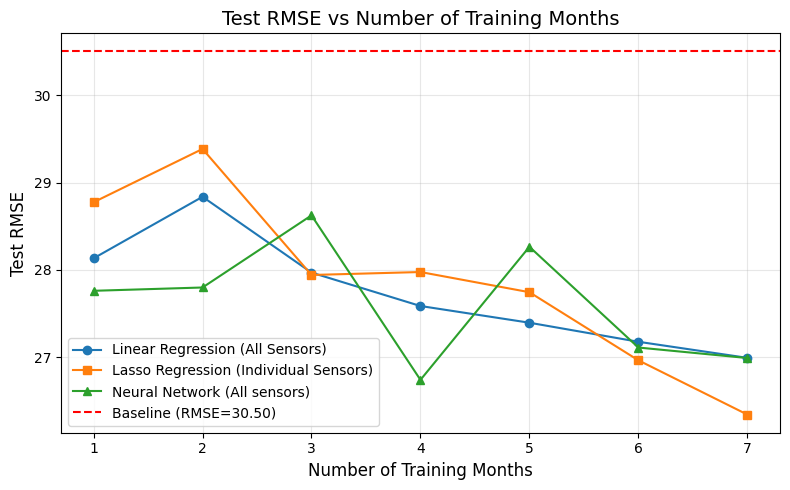

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.plot(results_df["number_of_months"], results_df["rmse_test_lr"], marker='o', label='Linear Regression (All Sensors)')
plt.plot(results_df["number_of_months"], results_df["rmse_test_lasso"], marker='s', label='Lasso Regression (Individual Sensors)')
plt.plot(results_df["number_of_months"], results_df["rmse_test_nn"], marker='^', label='Neural Network (All sensors)')

plt.axhline(y=rmse_test_base, color='red', linestyle='--', linewidth=1.5, label=f'Baseline (RMSE={rmse_test_base:.2f})')

plt.title("Test RMSE vs Number of Training Months", fontsize=14)
plt.xlabel("Number of Training Months", fontsize=12)
plt.ylabel("Test RMSE", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

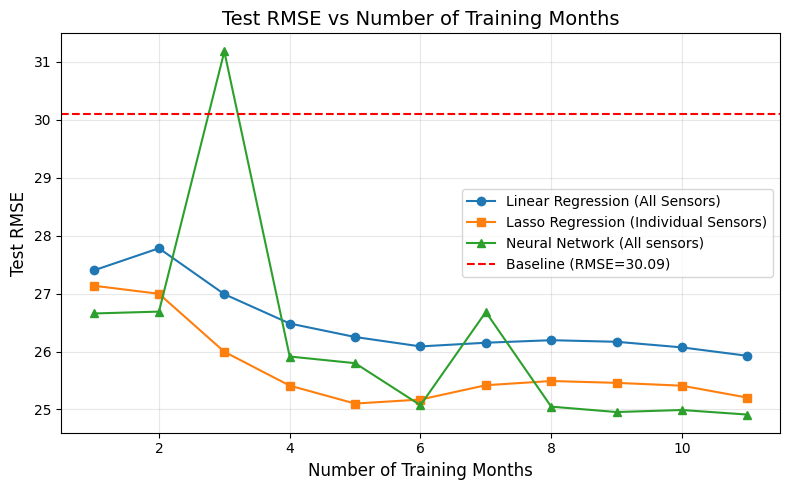

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.plot(results_df_2["number_of_months"], results_df_2["rmse_test_lr"], marker='o', label='Linear Regression (All Sensors)')
plt.plot(results_df_2["number_of_months"], results_df_2["rmse_test_lasso"], marker='s', label='Lasso Regression (Individual Sensors)')
plt.plot(results_df_2["number_of_months"], results_df_2["rmse_test_nn"], marker='^', label='Neural Network (All sensors)')

plt.axhline(y=rmse_test_base_exp_3, color='red', linestyle='--', linewidth=1.5, label=f'Baseline (RMSE={rmse_test_base_exp_3:.2f})')

plt.title("Test RMSE vs Number of Training Months", fontsize=14)
plt.xlabel("Number of Training Months", fontsize=12)
plt.ylabel("Test RMSE", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

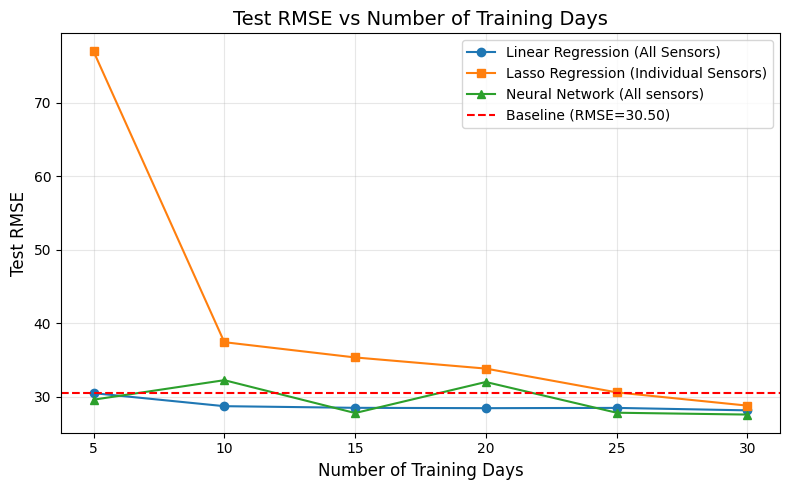

In [27]:


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.plot(results_df_extended["number_of_days"], results_df_extended["rmse_test_lr"], marker='o', label='Linear Regression (All Sensors)')
plt.plot(results_df_extended["number_of_days"], results_df_extended["rmse_test_lasso"], marker='s', label='Lasso Regression (Individual Sensors)')
plt.plot(results_df_extended["number_of_days"], results_df_extended["rmse_test_nn"], marker='^', label='Neural Network (All sensors)')

plt.axhline(y=rmse_test_base, color='red', linestyle='--', linewidth=1.5, label=f'Baseline (RMSE={rmse_test_base:.2f})')

plt.title("Test RMSE vs Number of Training Days", fontsize=14)
plt.xlabel("Number of Training Days", fontsize=12)
plt.ylabel("Test RMSE", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

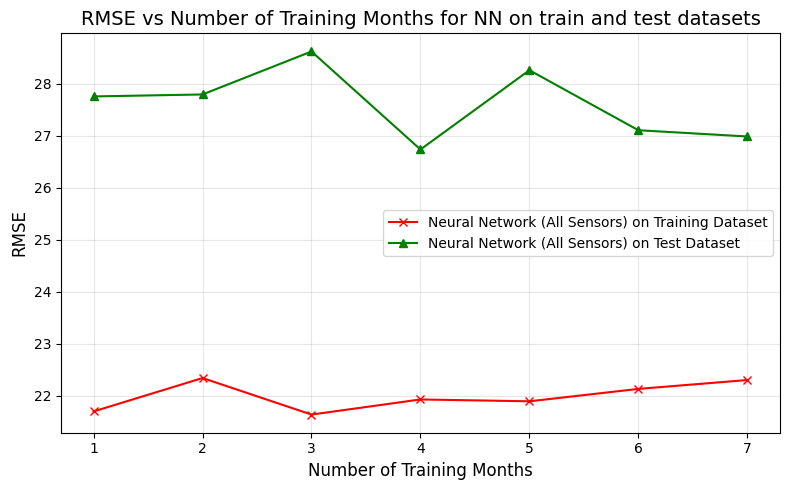

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.plot(results_df["number_of_months"], results_df["rmse_train_nn"], marker='x', label='Neural Network (All Sensors) on Training Dataset', color="red")
plt.plot(results_df["number_of_months"], results_df["rmse_test_nn"], marker='^', label='Neural Network (All Sensors) on Test Dataset', color = "green")


plt.title("RMSE vs Number of Training Months for NN on train and test datasets", fontsize=14)
plt.xlabel("Number of Training Months", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()